Kernal Used: PUI2016_Python3

In [2]:
from __future__ import print_function, division
import pandas as pd
import numpy as np
import os
import json
import pylab as pl
import matplotlib as plt
import statsmodels.api as sm
import datetime
#import url
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
PUIDATA = os.getenv("PUIDATA")
print(PUIDATA)

/home/cusp/ep2247/PUIdata


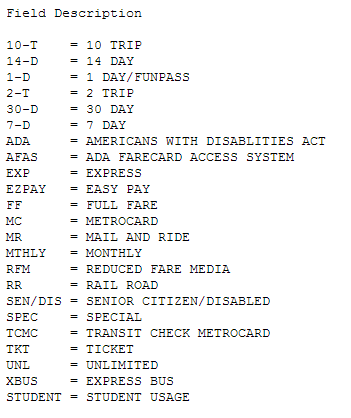

In [5]:
from IPython.display import Image
Image(filename = PUIDATA + "/Homework10/Ridetypes.png")

In [6]:
mtaRides = np.load(PUIDATA + "/Homework10/MTA_Fare.npy")

mtaRides = np.load('MTA_Fare.npy')

url = 'https://github.com/fedhere/PUI2017_fb55/blob/master/HW10_fb55/MTA_Fare.npy'
np.load(url)

In [7]:
mtaRides.shape

(600, 23, 194)

#### Task 1:

##### Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.

##### Identify it, figure out the date (you know when the data starts and what the cadence is) and figure out what it is due to.

In [8]:
rideType = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [9]:
dates = pd.date_range(start = '05/21/2010', periods = 194, freq = 'W-FRI')
dates

DatetimeIndex(['2010-05-21', '2010-05-28', '2010-06-04', '2010-06-11',
               '2010-06-18', '2010-06-25', '2010-07-02', '2010-07-09',
               '2010-07-16', '2010-07-23',
               ...
               '2013-11-29', '2013-12-06', '2013-12-13', '2013-12-20',
               '2013-12-27', '2014-01-03', '2014-01-10', '2014-01-17',
               '2014-01-24', '2014-01-31'],
              dtype='datetime64[ns]', length=194, freq='W-FRI')

In [10]:
week = []

for i in range(194):
    x = []
    for j in range(600):
        for k in range(23):
            x.append(mtaRides[j][k][i])
    i = sum(x)
    week.append(i)

In [14]:
tmean = np.mean(week)
tstd = np.std(week)

In [15]:
print(tmean, tstd)

29778001.6082 2984034.34784


In [16]:
thold = [(tmean + 3*tstd), (tmean - 3*tstd)]
thold

[38730104.651779145, 20825898.564715698]

Text(0.5,1,'Total number of MTA subway swipes from 5-21-2010 to 2-21-2014')

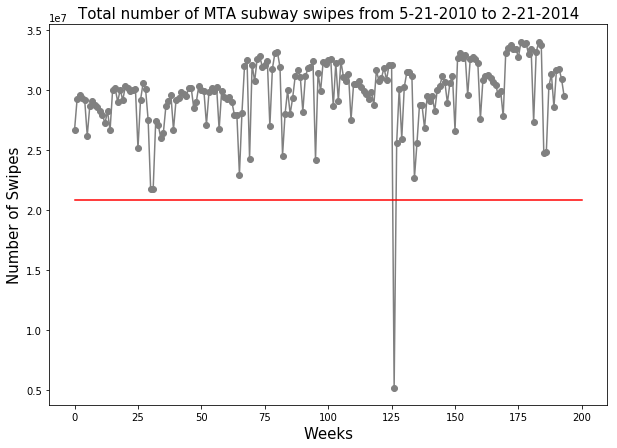

In [70]:
ax = figure(figsize = (10,7))
pl.plot(week, 'o-', color = 'grey')
pl.plot((0,200), (thold[1],thold[1]), color = 'red')
pl.xlabel('Weeks', fontsize = 15)
pl.ylabel('Number of Swipes', fontsize = 15)
plt.title("Total number of MTA subway swipes from 5-21-2010 to 2-21-2014",
         fontsize = 15)

##### Figure 1: Total number of MTA subway swipes between 5-21-2010 and 2-21-2014

In [23]:
for i in range(len(week)):
    if week[i] < thold[1]:
        print("Week there is fewer rides then 3 times the standard deviation away from the mta rides is week {}".format(i))

Week there is fewer rides then 3 times the standard deviation away from the mta rides is week 126


In [24]:
print("the number of rides for week 126 is {} rides".format(week[126]))

the number of rides for week 126 is 5215466 rides


In [25]:
startdate = datetime.datetime.strptime('05/21/2010',"%m/%d/%Y")
eventdate = startdate + datetime.timedelta(days = (126*7))
print(eventdate)

2012-10-19 00:00:00


In [71]:
enddate = datetime.datetime.strptime('02/21/2014',"%m/%d/%Y")
eventdate2 = enddate - datetime.timedelta(days = ((194 -126)*7))
print(eventdate2)

2012-11-02 00:00:00


#### Week 126 is the most prominent event in the time series was around the time that Superstorm Sandy hit NYC.

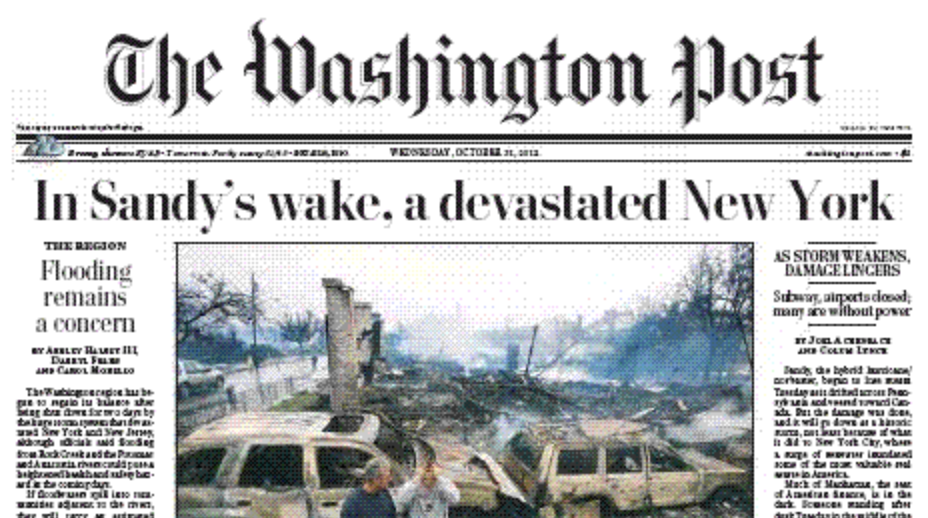

In [30]:
Image(filename = PUIDATA + "/Homework10/Sandy.png")

#### Task 2

##### Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the ridership types that have steadily increased in popularity, and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks

In [31]:
mtaRides = mtaRides.astype('float')
mtaRides[mtaRides == -1] = 0

In [32]:
#mtaRides

In [33]:
station = np.nansum(mtaRides, axis = 1)
station = np.nansum(station, axis =1)
station.shape

(600,)

In [34]:
station

array([  2.31599080e+07,   4.00852800e+06,   1.40536300e+06,
         3.68942100e+06,   3.95208400e+06,   4.32051100e+06,
         2.68836700e+06,   2.50145000e+06,   2.19604100e+06,
         3.70934550e+07,   6.92062840e+07,   6.78717400e+07,
         2.10036810e+07,   3.58307040e+07,   2.42674980e+07,
         8.38733200e+06,   3.56462000e+07,   5.37318730e+07,
         1.72986170e+07,   6.26923970e+07,   4.17182740e+07,
         7.85456840e+07,   5.58699970e+07,   2.14842000e+07,
         3.22825740e+07,   5.00000000e+00,   2.58960740e+07,
         2.55956780e+07,   5.43950230e+07,   2.28965630e+07,
         3.74584320e+07,   3.68138980e+07,   7.56932700e+07,
         8.70143800e+06,   2.64196320e+07,   5.52281300e+06,
         6.24016100e+06,   2.07963900e+06,   5.45836600e+06,
         8.43233600e+06,   2.12304640e+07,   4.81599500e+06,
         2.41521090e+07,   3.74643390e+07,   2.50292550e+07,
         7.66311260e+07,   4.24007630e+07,   1.12906340e+07,
         2.52578580e+07,

In [35]:
ticket = np.average(mtaRides, axis = 0, weights = station)
ticket.shape

(23, 194)

In [36]:
ticket

array([[  5.63340748e+04,   6.17773982e+04,   6.31882222e+04, ...,
          6.52732762e+04,   6.18529105e+04,   6.18452046e+04],
       [  2.57208293e+03,   2.85092628e+03,   2.86466914e+03, ...,
          3.35381592e+03,   3.25564369e+03,   3.27581256e+03],
       [  2.01254359e+02,   2.17828356e+02,   2.19481682e+02, ...,
          2.47667422e+02,   2.39904622e+02,   2.35311047e+02],
       ..., 
       [  1.40431487e+01,   1.39251584e+01,   1.47055628e+01, ...,
          1.27928807e+01,   1.37146045e+01,   1.46768442e+01],
       [  9.40951373e-01,   1.24430881e+00,   1.20712933e+00, ...,
          2.23319109e+00,   2.10182806e+00,   2.12376587e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          3.64242535e+03,   4.37503349e+03,   1.88462320e+03]])

In [38]:
ticketData = pd.DataFrame(ticket.T)
ticketData.set_index(dates, inplace = True)
ticketData.columns = rideType

ticketData.head()

,10t,14d,1d,2t,30d,7d,ada,afas,exp,ez,...,month,rfm,rr,sen,spec,tcmc,t,umlim,xbus,stud
2010-05-21,56334.074790,2572.082928,201.254359,819.864238,337.805584,16203.126566,42567.474899,43.947424,1975.386145,2272.499847,...,874.692011,3512.162863,365.202044,156.236317,0.000000,470.443080,46.351016,14.043149,0.940951,0.0
2010-05-28,61777.398180,2850.926275,217.828356,874.938174,465.491119,17344.645386,47610.128835,51.945672,1629.289566,2600.421963,...,1078.116535,4037.560830,421.766751,179.012644,0.000000,467.048203,47.837271,13.925158,1.244309,0.0
2010-06-04,63188.222224,2864.669137,219.481682,877.693986,415.971395,17612.573330,47657.955182,53.966113,1743.895815,2794.618783,...,1074.543548,4072.210887,427.368986,180.624177,0.000000,464.634867,47.320176,14.705563,1.207129,0.0
2010-06-11,62274.922483,2731.736640,220.209563,864.882501,273.051524,17575.545337,47478.153663,49.007266,1766.155302,2743.386200,...,1042.107917,4012.226047,415.502820,180.076583,0.000000,461.272011,47.609440,14.986177,1.260060,0.0
2010-06-18,62802.130984,2654.211880,215.735715,858.840584,256.912269,17172.351158,46799.596077,45.840745,1939.812297,2566.294464,...,980.271607,3849.844354,405.599525,176.116554,0.507615,459.832748,44.613749,14.223231,1.175779,0.0


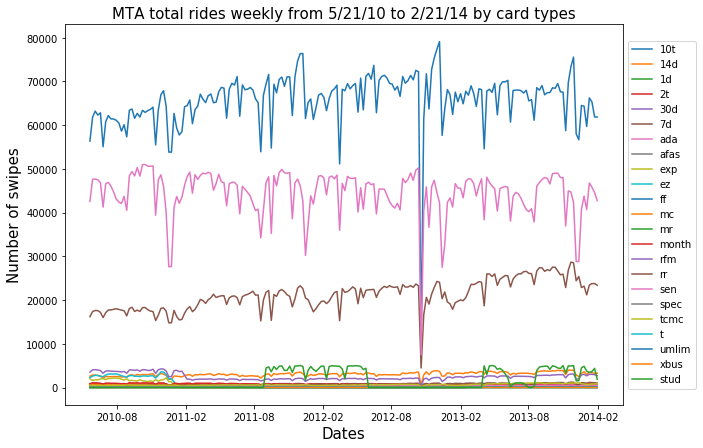

In [72]:
pl.figure = figure(figsize = (10,7))
pl.plot(ticketData)
pl.title('MTA total rides weekly from 5/21/10 to 2/21/14 by card types',
        fontsize = 15)
pl.xlabel('Dates', fontsize = 15)
pl.ylabel('Number of swipes', fontsize = 15)
pl.legend(rideType, loc='center left', bbox_to_anchor=(1, 0.5))
pl.show()

##### Figure 2: MTA total rides by each of the 23 card types from 5/21/2010 to 2/21/2014

In [42]:
rideType

array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp', 'ez',
       'ff', 'mc', 'mr', 'month', 'rfm', 'rr', 'sen', 'spec', 'tcmc', 't',
       'umlim', 'xbus', 'stud'], 
      dtype='<U5')

In [43]:
ticketMean = []
for i in ticketData.columns:
    ticketMean.append(pd.rolling_mean(ticketData[i], 10))

ticketMean

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()
  app.launch_new_instance()


[2010-05-21             NaN
 2010-05-28             NaN
 2010-06-04             NaN
 2010-06-11             NaN
 2010-06-18             NaN
 2010-06-25             NaN
 2010-07-02             NaN
 2010-07-09             NaN
 2010-07-16             NaN
 2010-07-23    60716.561218
 2010-07-30    61192.575114
 2010-08-06    61061.182398
 2010-08-13    60604.081091
 2010-08-20    60385.280916
 2010-08-27    59835.980841
 2010-09-03    60672.042521
 2010-09-10    60961.556515
 2010-09-17    60898.453584
 2010-09-24    61025.192381
 2010-10-01    61068.548353
 2010-10-08    61295.468600
 2010-10-15    61539.870427
 2010-10-22    62007.795356
 2010-10-29    62357.860798
 2010-11-05    63035.702320
 2010-11-12    62241.267131
 2010-11-19    62216.279386
 2010-11-26    62756.327732
 2010-12-03    63274.512341
 2010-12-10    63518.530143
                   ...     
 2013-07-12    67380.982900
 2013-07-19    67879.024989
 2013-07-26    67772.342376
 2013-08-02    67335.252453
 2013-08-09    66928

In [44]:
ticketRollingMean = pd.DataFrame(ticketMean).T
ticketRollingMean.head(11)

,10t,14d,1d,2t,30d,7d,ada,afas,exp,ez,...,month,rfm,rr,sen,spec,tcmc,t,umlim,xbus,stud
2010-05-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-23,60716.561218,2578.248058,210.193449,837.852660,348.576663,17230.214145,45756.033489,47.970648,1917.012168,2753.320016,...,976.375081,3774.833824,393.699681,172.312650,1.016705,460.548550,46.542500,14.975987,1.242934,0.0


In [45]:
ticketRollingMean.shape

(194, 23)

In [46]:
ticketRollingMean.columns

Index(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp', 'ez', 'ff',
       'mc', 'mr', 'month', 'rfm', 'rr', 'sen', 'spec', 'tcmc', 't', 'umlim',
       'xbus', 'stud'],
      dtype='object')

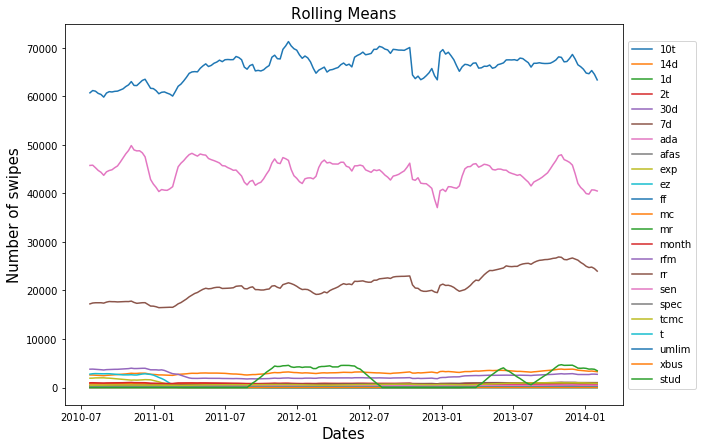

In [47]:
pl.figure = figure(figsize = (10,7))
pl.plot(ticketRollingMean)
pl.title('Rolling Means', fontsize = 15)
pl.xlabel('Dates', fontsize = 15)
pl.ylabel('Number of swipes', fontsize = 15)
pl.legend(rideType, loc='center left', bbox_to_anchor=(1, 0.5))
pl.show()

##### Figure 3: Plot showing the rolling means for each of the 23 card types.  Looking at the plot you can see that there are 4 card types (brown , pink, blue, and green lines) on the plot that stand out as potentially being not stationary.

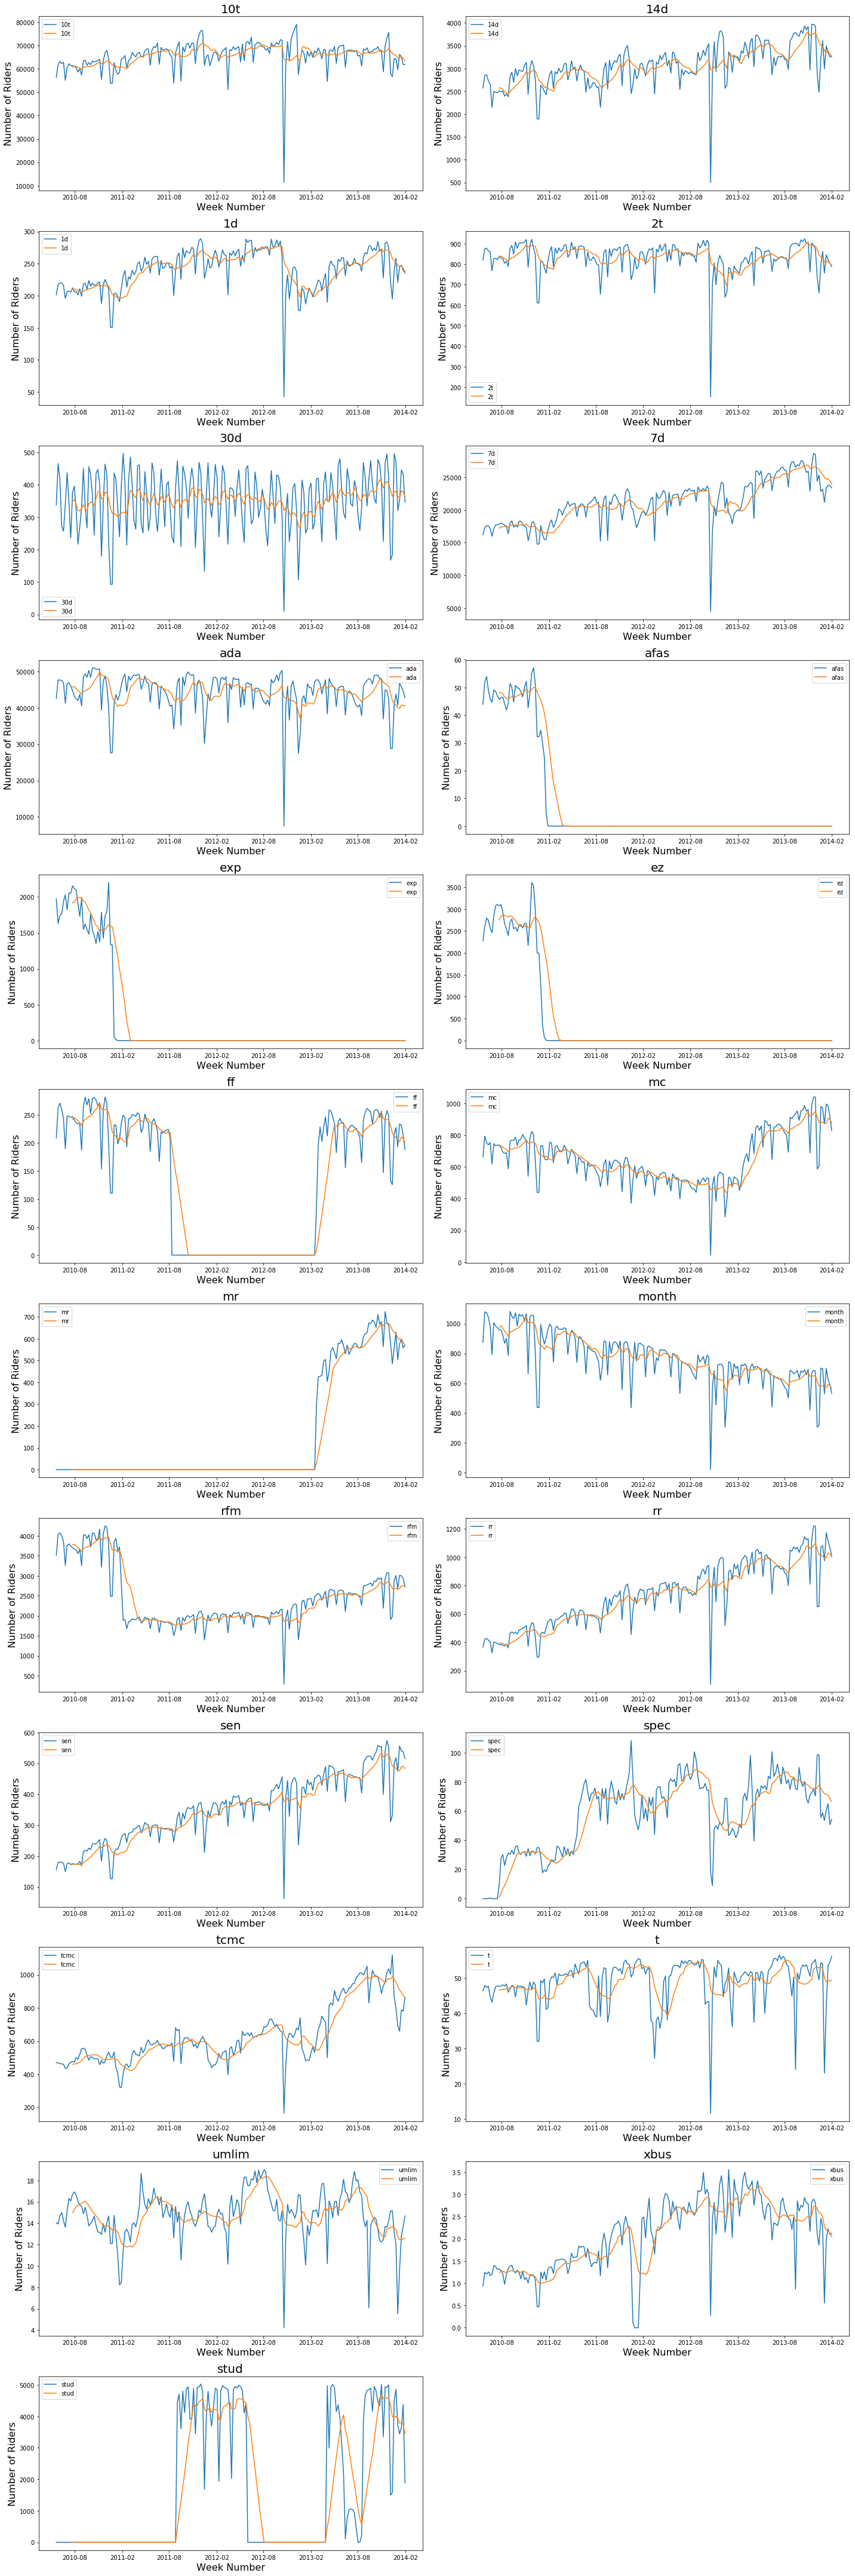

In [30]:
pl.figure = figure(figsize = (20,60))
for i in range(len(dfticket.columns)):
    pl.subplot(12,2,i+1)
    pl.plot(dfticket.iloc[:,i])
    pl.plot(dfticketmean.iloc[:,i])
    pl.title(dfticket.columns[i], fontsize = 20)
    pl.xlabel('Week Number', fontsize = 16)
    pl.ylabel('Number of Riders', fontsize = 16)
    pl.legend(fontsize = 10)

pl.tight_layout()
pl.show()
#pl.tight_layout()

##### Figure 4: Subway swipes per card type with rolling mean

In [31]:
stationary = []
notstationary = []

for i in range(len(dfticket.columns)):
    stationarytest = sm.tsa.adfuller(dfticket.iloc[:,i])
    if (stationarytest[0] > stationarytest[4]['5%']):
        notstationary.append(dfticket.columns[i])
    else:
        stationary.append(dfticket.columns[i])
        
print("AD Fuller test results for MTA's 23 card types time series:\n")
print("Stationary Card Type time series:\n",stationary)
print("\nNon-Stationary Card Type time series:\n",notstationary)

AD Fuller test results for MTA's 23 card types time series:

Stationary Card Type time series:
 ['10t', '2t', '30d', 'ada', 'exp', 't', 'umlim']

Non-Stationary Card Type time series:
 ['14d', '1d', '7d', 'afas', 'ez', 'ff', 'mc', 'mr', 'month', 'rfm', 'rr', 'sen', 'spec', 'tcmc', 'xbus', 'stud']


In [48]:
stationaryTest = sm.tsa.adfuller(ticketData.iloc[:,1])
stationaryTest

(-2.3682146013292438,
 0.15090926367878343,
 7,
 186,
 {'1%': -3.466005071659723,
  '10%': -2.5751221620996647,
  '5%': -2.8772078537639385},
 2611.9478887888572)

##### Calculating what card types have the largest trend and the smallest trend

In [49]:
firstTen = np.mean(ticketData[:10])
lastTen = np.mean(ticketData[-10:])

In [50]:
meanratio = lastTen / firstTen

In [51]:
meanratio.sort_values()

ez       2.286805e-06
exp      9.669576e-06
afas     2.904615e-04
month    5.823893e-01
rfm      7.205441e-01
ff       8.303213e-01
umlim    8.417109e-01
ada      8.849108e-01
2t       9.480758e-01
30d      1.043213e+00
10t      1.043850e+00
t        1.059885e+00
1d       1.131084e+00
mc       1.206578e+00
14d      1.261076e+00
7d       1.391589e+00
xbus     1.650609e+00
tcmc     1.870068e+00
rr       2.548188e+00
sen      2.805155e+00
spec     6.551935e+01
mr       2.187133e+04
stud              inf
dtype: float64

In [52]:
topValues = meanratio[-4:]
print("The top 4 card types are: \n",topValues)

The top 4 card types are: 
 t        1.059885
umlim    0.841711
xbus     1.650609
stud          inf
dtype: float64


In [53]:
lowestValues = meanratio[:4]
print("The lowest 4 card types are: \n",lowestValues)

The lowest 4 card types are: 
 10t    1.043850
14d    1.261076
1d     1.131084
2t     0.948076
dtype: float64


#### Task 3:
##### Several stations show a prominent annual periodicity. Identify the 4 stations (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?

In [55]:
stations = np.nansum(mtaRides, axis = 1)

In [56]:
station.shape

(600,)

In [57]:
stations.shape

(600, 194)

In [58]:
N = len(dates)

In [59]:
print ("There are n=%d datapoints in the series"%N)

There are n=194 datapoints in the series


<function matplotlib.pyplot.show>

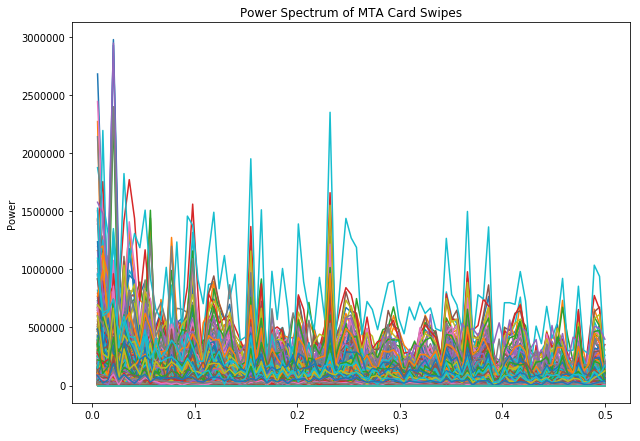

In [60]:
pl.figure = figure(figsize = (10,7))
for i in range(len(stations)):
    f = np.abs(np.fft.rfft(stations[i]))
    pl.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')
pl.xlabel('Frequency (weeks)')
pl.ylabel('Power')
pl.title("Power Spectrum of MTA Card Swipes")
pl.show

##### Figure 5: Power spectrum of the MTA card swipes for all 600 stations

#### EXTRA CREDIT: Cluster.


##### Cluster the time series, i.e. identify groups of time series that look similar among each other. You can use KMeans for example to identify common trends, or PCA (Principle Component Analysis).

In [61]:
tots = mtaRides.transpose(2,0,1).reshape(mtaRides.shape[2], 
                                         mtaRides.shape[1]*mtaRides.shape[0]).T



In [62]:
tots.shape

(13800, 194)

In [63]:
tots = tots[tots.std(1)>0]

In [64]:
vals = ((tots.T - tots.mean(1))/tots.std(1)).T

In [65]:
kMeans = KMeans(n_clusters = 7).fit(vals)
fitValues = kMeans.fit_predict(vals)
print(fitValues)

[2 2 2 ..., 2 6 1]


In [66]:
n = 7
pca = PCA(n)
Xproj = pca.fit_transform(vals)
eigenvalues = pca.explained_variance_
print(pca.explained_variance_ratio_)

[ 0.36107279  0.13466083  0.06377903  0.05034579  0.04275826  0.02626992
  0.01659132]


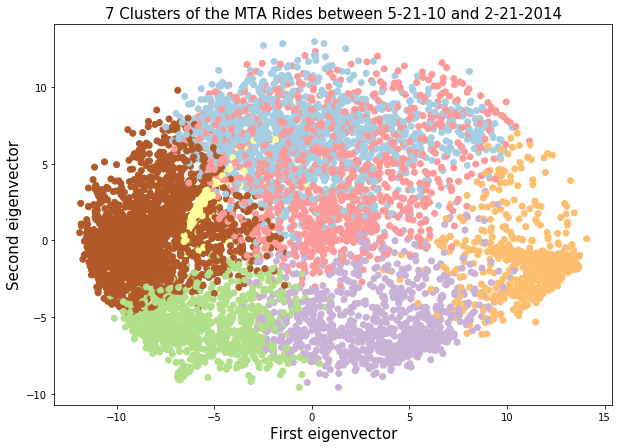

In [69]:
pl.figure = figure(figsize = (10,7))
pl.clf()

pl.scatter(Xproj[:, 0], Xproj[:, 1], c = fitValues, 
           cmap = plt.cm.Paired)
pl.title('7 Clusters of the MTA Rides between 5-21-10 and 2-21-2014', fontsize = 15)
pl.xlabel('First eigenvector', fontsize = 15)
pl.ylabel('Second eigenvector', fontsize = 15)
pl.show()

##### Figure 6: Clustering of aubway timeseries.  There are 7 clusters in this figure.